In [2]:
import sys
# scipy
import scipy
# numpy
import numpy
# matplotlib
import matplotlib
# pandas
import pandas
# scikit-learn
import sklearn
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import csv
from pandas import DataFrame
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMAResults
from math import sqrt
from pandas import Grouper
from statsmodels.tsa.stattools import adfuller
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
from scipy.stats import boxcox

url1 = 'tbl_monitor_data_export.csv'
url2 = 'tbl_monitors_export.csv'
series = pandas.read_csv(url1,header=0)
series['ts']=pandas.to_datetime(series['ts'])
series=series.set_index('ts')
series['Day']=series.index.day
print(series['Day'].head(4))
dataset1= pandas.read_csv(url2)

#Dataset for each id
numMax=series['monitor_id'].max()
for i in range(1,numMax+1):
    df=series.loc[series['monitor_id'] == i]
    print(df.describe())
    a=df.describe()
    print(dataset1.loc[dataset1['id']==i]['label'])
    print(dataset1.loc[dataset1['id']==1]['host_uri'])
    print("have speed: Mean=%f and std = %f "%(a.loc['mean']['result_float2'],a.loc['std']['result_float2']))
dataseta=series.loc[series['monitor_id'] == 1]
#Validation Dataset
split_point=int(len(dataseta)*0.8)
dataset, validation=dataseta[0:split_point],dataseta[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

# Peristence
X = dataset['result_float2'].values
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
i=0
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
    print(i)
    i=i+1
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
#Try to draw it on X Y

#PLOT
dataseta['result_float2'].plot()
plt.show()
dataseta['result_float2'].hist()
plt.show()
dataseta['result_float2'].plot(kind='kde')
plt.show()
dataseta['result_float2'].plot(kind='box', subplots=True, layout=(2,2), sharex=False,sharey=False)
plt.show()
dataseta.hist(ax=plt.gca())
plt.show()
autocorrelation_plot(dataseta['result_float2'])
plt.show()
#timegrouper
print('id1')
print(dataseta['result_float2'].head())
print(dataseta.shape)
#ARIMA Model
## manually configured ARIMA
def difference(dataset, interval=1):
    diff =list()
    for i in range (interval, len(dataset)):
        value = dataset[i]-dataset[i-interval]
        diff.append(value)
    return diff
# X= dataset['result_float2'].values
# months_in_year=12
# stationary = difference(X, months_in_year)
# stationary.index = dataset.index[months_in_year:]
# #check if stationary
# result = adfuller(stationary)
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])
# print('Critical Values:')
# for key, value in result[4].items():
#     print('\t%s: %.3f' % (key, value))
# save
# stationary.to_csv('stationary.csv')
# # plot
# stationary.plot()
# plt.show()
# # Draw ACF and PACF Autocorrelation Function and Partial
# plt.figure()
# plt.subplot(211)
# plot_acf(stationary, ax=plt.gca())
# plt.subplot(212)
# plot_pacf(stationary, ax=plt.gca())
# plt.show()
#Try  1 1 1
#create a differenced series
def inverse_difference(history, yhat, interval=1):
    return yhat+history[-interval]

#Walk-forward validation
# for i in range(len(test)):
#     # difference data
#     months_in_year =12
#     diff=difference(history, months_in_year)
#     #predict
#     model=ARIMA(diff, order=(0,0,1))
#     model_fit=model.fit(trend='nc', disp=0)
#     yhat=model_fit.forecast()[0]
#     yhat=inverse_difference(history, yhat, months_in_year)
#     predictions.append(yhat)
#     #observation
#     obs=test[i]
#     history.append(obs)
#     print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# # report performance
# mse = mean_squared_error(test, predictions)
# rmse = sqrt(mse)
# print('RMSE: %.3f' % rmse)

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
# def evaluate_arima_model(X, arima_order):
#     #prepare training dataset
#     train_size = int(len(X)*0.5)
#     train, test = X[0:train_size], X[train_size:]
#     history =[x for x in train]
#     #make prediction
#     predictions=list()
#     for t in range(len(test)):
#         #difference data
#         months_in_year=12
#         diff = difference(history, months_in_year)
#         model = ARIMA(diff, order=arima_order)
#         model_fit=model.fit(trend='nc', disp=0)
#         yhat = model_fit.forecast()[0]
#         yhat = inverse_difference(history, yhat, months_in_year)
#         predictions.append(yhat)
#         history.append(test[t])
#     mse = mean_squared_error(test, predictions)
#     rmse=sqrt(mse)
#     return rmse
# evaluate combinations of p, d and q values for an ARIMA model
# def evaluate_models(dataset, p_values, d_values, q_values):
#     best_score, best_cfg = float('inf'), None
#     for p in p_values:
#         for d in d_values:
#             for q in q_values:
#                 order = (p,d,q)
#                 try:
#                     mse = evaluate_arima_model(dataset, order)
#                     if mse < best_score:
#                         best_score, best_cfg =mse, order
#                     print('ARIMA%s RMSE=%.3f' %(order, mse))
#                 except:
#                     continue
#     print('Best Arima%s RMSE=%.3f' % (best_cfg, best_score))
#
# #load dataset
# p_values = range(0,7)
# d_values = range(0,3)
# q_values = range(0,7)
# warnings.filterwarnings("ignore")
# evaluate_models(dataset['result_float2'][0:5000], p_values, d_values, q_values)

#find bias
X = dataset['result_float2'].values
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
# history = [x for x in train]
# predictions = list()
# for i in range(len(test)):
#     months_in_year=12
#     diff=difference(history, months_in_year)
#     #predict
#     model = ARIMA(diff, order=(0,0,1))
#     model_fit=model.fit(trend='nc', disp=0)
#     yhat=model_fit.forecast()[0]
#     yhat=inverse_difference(history, yhat, months_in_year)
#     predictions.append(yhat)
#     obs=test[i]
#     history.append(obs)
# residuals=[test[i]-predictions[i] for i in range(len(test))]
# residuals = DataFrame(residuals)
# print(residuals.describe())
# bias = residuals.describe()[1]
# print(bias)
# ## Finalize Model
# def __getnewargs__(self):
#     return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
#
# ARIMA.__getnewargs__ = __getnewargs__
# # create a differenced series
# #load data
minutes_in_hour=60
diff= difference(X, minutes_in_hour)
# #fit model
# model = ARIMA(diff, order=(0,0,1))
# model_fit = model.fit(trend='nc', disp=0)
# #bias constant
# #save model
# model_fit.save('model.pkl')
# numpy.save('model_bias.npy',[bias])
# yhat=float(model_fit.forecast()[0])
# yhat= bias + inverse_difference(X, yhat, months_in_year)
# print('Predicted: %.3f' %yhat)
#
#
#
#load and prepare datasets
X = dataset['result_float2'].values
train_size = int(len(X) * 0.8)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
#predictions =

bias= -0.000014
y=validation['result_float2'].values
#load model
model = ARIMA(diff, order=(0,0,1))
model_fit = model.fit(disp=0)
model_fit.save('model.pkl')
predictions=list()
#print(model_fit)
#predictions=model_fit.forecast()
#make first prediction
predictions = list()
yhat=model_fit.forecast()[0]
yhat   = bias+inverse_difference(history, yhat, minutes_in_hour)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%3.f' % (yhat, y[0]))
#rolling forecasts
for i in range(1, len(y)):
    #difference data
    months_in_year =12
    diff = difference(history, minutes_in_hour)
    #predict
    model = ARIMA(diff, order=(0,0,1))
    model_fit=model.fit(trend='nc',disp=0)
    yhat = model_fit.forecast()[0]
    yhat = bias + inverse_difference(history, yhat, minutes_in_hour)
    predictions.append(yhat)
    #observation
    obs = y[i]
    history.append(obs)
    print(i)
    print('>predicted=%.3f, Expected=%.3f' %(yhat, obs))
#report performance
mse=mean_squared_error(y, predictions)
rmse=sqrt(mse)
print('RMSE: %.3f' %rmse)
#
start_index = len(diff)
end_index = start_index + 8640
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
day = 1
for yhat in forecast:
    inverted = bias +inverse_difference(history, yhat, minutes_in_hour)
    print('Day %d: %f' % (day, inverted))
    history.append(inverted)
    predictions.append(inverted)
    day += 1
#model_fit.save('model1.pkl')
#print(model_fit)
#predictions=model_fit.forecast()
#make first prediction
plt.plot(y)
plt.plot(predictions, color='red')
plt.show()
#try
# model = ARIMA(diff, order=(0,0,1))
# model_fit = model.fit(disp=0)
# multi-step out-of-sample forecast


ts
2019-07-17 07:46:09.623416    17
2019-07-17 07:46:10.155872    17
2019-07-17 07:46:11.212859    17
2019-07-17 07:46:12.503839    17
Name: Day, dtype: int64
                 id  monitor_id  result_float1  result_float2           Day
count  18304.000000     18304.0   18304.000000   18304.000000  18304.000000
mean   44161.144996         1.0       0.999672       1.138049     17.641171
std    26311.084704         0.0       0.025603       0.649202     10.140851
min        1.000000         1.0      -1.000000       0.000000      1.000000
25%    21189.750000         1.0       1.000000       1.006237      6.000000
50%    44077.500000         1.0       1.000000       1.082552     21.000000
75%    66980.250000         1.0       1.000000       1.193509     26.000000
max    89876.000000         1.0       1.000000      38.867926     31.000000
2    Formotiv DEV API
Name: label, dtype: object
2    https://betapi.formotiv.com/v1/ping
Name: host_uri, dtype: object
have speed: Mean=1.138049 and std = 0

407
>Predicted=1.148, Expected=1.381
408
>Predicted=1.381, Expected=1.231
409
>Predicted=1.231, Expected=1.047
410
>Predicted=1.047, Expected=1.191
411
>Predicted=1.191, Expected=1.180
412
>Predicted=1.180, Expected=1.031
413
>Predicted=1.031, Expected=1.349
414
>Predicted=1.349, Expected=1.021
415
>Predicted=1.021, Expected=1.219
416
>Predicted=1.219, Expected=1.239
417
>Predicted=1.239, Expected=1.135
418
>Predicted=1.135, Expected=1.287
419
>Predicted=1.287, Expected=1.244
420
>Predicted=1.244, Expected=1.196
421
>Predicted=1.196, Expected=1.065
422
>Predicted=1.065, Expected=1.018
423
>Predicted=1.018, Expected=1.190
424
>Predicted=1.190, Expected=1.036
425
>Predicted=1.036, Expected=1.042
426
>Predicted=1.042, Expected=1.064
427
>Predicted=1.064, Expected=1.005
428
>Predicted=1.005, Expected=1.219
429
>Predicted=1.219, Expected=1.096
430
>Predicted=1.096, Expected=1.231
431
>Predicted=1.231, Expected=1.148
432
>Predicted=1.148, Expected=1.009
433
>Predicted=1.009, Expected=1.146
4

>Predicted=1.009, Expected=1.230
889
>Predicted=1.230, Expected=1.321
890
>Predicted=1.321, Expected=1.402
891
>Predicted=1.402, Expected=1.003
892
>Predicted=1.003, Expected=1.004
893
>Predicted=1.004, Expected=1.346
894
>Predicted=1.346, Expected=1.131
895
>Predicted=1.131, Expected=1.057
896
>Predicted=1.057, Expected=1.132
897
>Predicted=1.132, Expected=1.088
898
>Predicted=1.088, Expected=1.128
899
>Predicted=1.128, Expected=1.012
900
>Predicted=1.012, Expected=1.010
901
>Predicted=1.010, Expected=1.550
902
>Predicted=1.550, Expected=0.994
903
>Predicted=0.994, Expected=1.053
904
>Predicted=1.053, Expected=1.284
905
>Predicted=1.284, Expected=1.419
906
>Predicted=1.419, Expected=1.173
907
>Predicted=1.173, Expected=1.191
908
>Predicted=1.191, Expected=1.155
909
>Predicted=1.155, Expected=1.388
910
>Predicted=1.388, Expected=1.395
911
>Predicted=1.395, Expected=1.348
912
>Predicted=1.348, Expected=1.323
913
>Predicted=1.323, Expected=1.045
914
>Predicted=1.045, Expected=1.414
915
>

>Predicted=1.245, Expected=1.068
1298
>Predicted=1.068, Expected=1.002
1299
>Predicted=1.002, Expected=1.202
1300
>Predicted=1.202, Expected=1.156
1301
>Predicted=1.156, Expected=1.198
1302
>Predicted=1.198, Expected=1.478
1303
>Predicted=1.478, Expected=1.406
1304
>Predicted=1.406, Expected=1.191
1305
>Predicted=1.191, Expected=1.008
1306
>Predicted=1.008, Expected=1.230
1307
>Predicted=1.230, Expected=1.006
1308
>Predicted=1.006, Expected=1.164
1309
>Predicted=1.164, Expected=1.081
1310
>Predicted=1.081, Expected=1.183
1311
>Predicted=1.183, Expected=1.330
1312
>Predicted=1.330, Expected=1.314
1313
>Predicted=1.314, Expected=1.108
1314
>Predicted=1.108, Expected=1.189
1315
>Predicted=1.189, Expected=1.086
1316
>Predicted=1.086, Expected=1.181
1317
>Predicted=1.181, Expected=1.284
1318
>Predicted=1.284, Expected=1.060
1319
>Predicted=1.060, Expected=1.049
1320
>Predicted=1.049, Expected=1.067
1321
>Predicted=1.067, Expected=1.292
1322
>Predicted=1.292, Expected=1.400
1323
>Predicted=1

>Predicted=1.156, Expected=1.285
1766
>Predicted=1.285, Expected=1.432
1767
>Predicted=1.432, Expected=1.044
1768
>Predicted=1.044, Expected=1.120
1769
>Predicted=1.120, Expected=1.168
1770
>Predicted=1.168, Expected=1.075
1771
>Predicted=1.075, Expected=1.159
1772
>Predicted=1.159, Expected=1.004
1773
>Predicted=1.004, Expected=1.367
1774
>Predicted=1.367, Expected=1.029
1775
>Predicted=1.029, Expected=1.020
1776
>Predicted=1.020, Expected=1.290
1777
>Predicted=1.290, Expected=1.086
1778
>Predicted=1.086, Expected=1.233
1779
>Predicted=1.233, Expected=1.251
1780
>Predicted=1.251, Expected=1.202
1781
>Predicted=1.202, Expected=1.298
1782
>Predicted=1.298, Expected=1.006
1783
>Predicted=1.006, Expected=1.188
1784
>Predicted=1.188, Expected=1.005
1785
>Predicted=1.005, Expected=1.104
1786
>Predicted=1.104, Expected=1.070
1787
>Predicted=1.070, Expected=1.015
1788
>Predicted=1.015, Expected=1.047
1789
>Predicted=1.047, Expected=1.001
1790
>Predicted=1.001, Expected=1.239
1791
>Predicted=1

>Predicted=1.606, Expected=1.310
2183
>Predicted=1.310, Expected=1.105
2184
>Predicted=1.105, Expected=1.171
2185
>Predicted=1.171, Expected=1.002
2186
>Predicted=1.002, Expected=1.199
2187
>Predicted=1.199, Expected=1.265
2188
>Predicted=1.265, Expected=1.192
2189
>Predicted=1.192, Expected=1.222
2190
>Predicted=1.222, Expected=1.071
2191
>Predicted=1.071, Expected=1.012
2192
>Predicted=1.012, Expected=1.081
2193
>Predicted=1.081, Expected=1.208
2194
>Predicted=1.208, Expected=1.190
2195
>Predicted=1.190, Expected=1.400
2196
>Predicted=1.400, Expected=1.084
2197
>Predicted=1.084, Expected=1.120
2198
>Predicted=1.120, Expected=1.297
2199
>Predicted=1.297, Expected=1.255
2200
>Predicted=1.255, Expected=1.246
2201
>Predicted=1.246, Expected=0.997
2202
>Predicted=0.997, Expected=1.298
2203
>Predicted=1.298, Expected=1.036
2204
>Predicted=1.036, Expected=1.009
2205
>Predicted=1.009, Expected=1.270
2206
>Predicted=1.270, Expected=1.154
2207
>Predicted=1.154, Expected=1.090
2208
>Predicted=1

2628
>Predicted=1.291, Expected=1.192
2629
>Predicted=1.192, Expected=1.571
2630
>Predicted=1.571, Expected=1.329
2631
>Predicted=1.329, Expected=1.327
2632
>Predicted=1.327, Expected=1.229
2633
>Predicted=1.229, Expected=1.236
2634
>Predicted=1.236, Expected=1.108
2635
>Predicted=1.108, Expected=1.380
2636
>Predicted=1.380, Expected=1.318
2637
>Predicted=1.318, Expected=1.346
2638
>Predicted=1.346, Expected=1.015
2639
>Predicted=1.015, Expected=1.032
2640
>Predicted=1.032, Expected=1.141
2641
>Predicted=1.141, Expected=1.333
2642
>Predicted=1.333, Expected=1.015
2643
>Predicted=1.015, Expected=1.242
2644
>Predicted=1.242, Expected=1.091
2645
>Predicted=1.091, Expected=1.041
2646
>Predicted=1.041, Expected=1.039
2647
>Predicted=1.039, Expected=1.041
2648
>Predicted=1.041, Expected=1.383
2649
>Predicted=1.383, Expected=1.085
2650
>Predicted=1.085, Expected=1.181
2651
>Predicted=1.181, Expected=1.488
2652
>Predicted=1.488, Expected=1.265
2653
>Predicted=1.265, Expected=1.057
2654
>Predic

3370
>Predicted=1.347, Expected=1.167
3371
>Predicted=1.167, Expected=1.151
3372
>Predicted=1.151, Expected=1.143
3373
>Predicted=1.143, Expected=1.130
3374
>Predicted=1.130, Expected=1.346
3375
>Predicted=1.346, Expected=1.124
3376
>Predicted=1.124, Expected=1.202
3377
>Predicted=1.202, Expected=1.014
3378
>Predicted=1.014, Expected=1.168
3379
>Predicted=1.168, Expected=1.146
3380
>Predicted=1.146, Expected=1.404
3381
>Predicted=1.404, Expected=1.113
3382
>Predicted=1.113, Expected=1.380
3383
>Predicted=1.380, Expected=1.115
3384
>Predicted=1.115, Expected=1.034
3385
>Predicted=1.034, Expected=1.127
3386
>Predicted=1.127, Expected=1.158
3387
>Predicted=1.158, Expected=1.405
3388
>Predicted=1.405, Expected=1.140
3389
>Predicted=1.140, Expected=1.328
3390
>Predicted=1.328, Expected=1.490
3391
>Predicted=1.490, Expected=1.002
3392
>Predicted=1.002, Expected=1.138
3393
>Predicted=1.138, Expected=0.996
3394
>Predicted=0.996, Expected=1.228
3395
>Predicted=1.228, Expected=1.050
3396
>Predic

>Predicted=1.120, Expected=1.346
3946
>Predicted=1.346, Expected=1.156
3947
>Predicted=1.156, Expected=1.116
3948
>Predicted=1.116, Expected=1.347
3949
>Predicted=1.347, Expected=1.150
3950
>Predicted=1.150, Expected=1.197
3951
>Predicted=1.197, Expected=0.972
3952
>Predicted=0.972, Expected=1.016
3953
>Predicted=1.016, Expected=1.051
3954
>Predicted=1.051, Expected=1.363
3955
>Predicted=1.363, Expected=1.132
3956
>Predicted=1.132, Expected=1.343
3957
>Predicted=1.343, Expected=1.380
3958
>Predicted=1.380, Expected=1.205
3959
>Predicted=1.205, Expected=1.134
3960
>Predicted=1.134, Expected=0.973
3961
>Predicted=0.973, Expected=1.133
3962
>Predicted=1.133, Expected=1.043
3963
>Predicted=1.043, Expected=1.196
3964
>Predicted=1.196, Expected=1.026
3965
>Predicted=1.026, Expected=1.378
3966
>Predicted=1.378, Expected=1.018
3967
>Predicted=1.018, Expected=0.977
3968
>Predicted=0.977, Expected=1.012
3969
>Predicted=1.012, Expected=0.984
3970
>Predicted=0.984, Expected=1.206
3971
>Predicted=1

4711
>Predicted=1.139, Expected=1.336
4712
>Predicted=1.336, Expected=1.155
4713
>Predicted=1.155, Expected=1.030
4714
>Predicted=1.030, Expected=1.135
4715
>Predicted=1.135, Expected=0.988
4716
>Predicted=0.988, Expected=1.494
4717
>Predicted=1.494, Expected=1.142
4718
>Predicted=1.142, Expected=1.178
4719
>Predicted=1.178, Expected=1.131
4720
>Predicted=1.131, Expected=1.132
4721
>Predicted=1.132, Expected=1.141
4722
>Predicted=1.141, Expected=1.315
4723
>Predicted=1.315, Expected=1.202
4724
>Predicted=1.202, Expected=1.174
4725
>Predicted=1.174, Expected=1.166
4726
>Predicted=1.166, Expected=1.179
4727
>Predicted=1.179, Expected=1.217
4728
>Predicted=1.217, Expected=1.382
4729
>Predicted=1.382, Expected=1.143
4730
>Predicted=1.143, Expected=1.397
4731
>Predicted=1.397, Expected=1.391
4732
>Predicted=1.391, Expected=1.198
4733
>Predicted=1.198, Expected=1.209
4734
>Predicted=1.209, Expected=1.105
4735
>Predicted=1.105, Expected=1.161
4736
>Predicted=1.161, Expected=1.016
4737
>Predic

>Predicted=1.043, Expected=1.070
5044
>Predicted=1.070, Expected=1.271
5045
>Predicted=1.271, Expected=0.983
5046
>Predicted=0.983, Expected=1.131
5047
>Predicted=1.131, Expected=1.246
5048
>Predicted=1.246, Expected=1.219
5049
>Predicted=1.219, Expected=1.016
5050
>Predicted=1.016, Expected=1.126
5051
>Predicted=1.126, Expected=1.116
5052
>Predicted=1.116, Expected=1.046
5053
>Predicted=1.046, Expected=1.182
5054
>Predicted=1.182, Expected=1.086
5055
>Predicted=1.086, Expected=0.986
5056
>Predicted=0.986, Expected=1.011
5057
>Predicted=1.011, Expected=0.992
5058
>Predicted=0.992, Expected=0.981
5059
>Predicted=0.981, Expected=0.972
5060
>Predicted=0.972, Expected=1.071
5061
>Predicted=1.071, Expected=0.981
5062
>Predicted=0.981, Expected=0.980
5063
>Predicted=0.980, Expected=1.259
5064
>Predicted=1.259, Expected=1.009
5065
>Predicted=1.009, Expected=1.000
5066
>Predicted=1.000, Expected=1.021
5067
>Predicted=1.021, Expected=0.974
5068
>Predicted=0.974, Expected=0.988
5069
>Predicted=0

5664
>Predicted=1.001, Expected=1.052
5665
>Predicted=1.052, Expected=1.237
5666
>Predicted=1.237, Expected=1.052
5667
>Predicted=1.052, Expected=0.972
5668
>Predicted=0.972, Expected=1.021
5669
>Predicted=1.021, Expected=0.978
5670
>Predicted=0.978, Expected=0.987
5671
>Predicted=0.987, Expected=0.977
5672
>Predicted=0.977, Expected=1.042
5673
>Predicted=1.042, Expected=1.004
5674
>Predicted=1.004, Expected=1.092
5675
>Predicted=1.092, Expected=1.034
5676
>Predicted=1.034, Expected=1.256
5677
>Predicted=1.256, Expected=1.188
5678
>Predicted=1.188, Expected=1.016
5679
>Predicted=1.016, Expected=1.187
5680
>Predicted=1.187, Expected=1.041
5681
>Predicted=1.041, Expected=1.001
5682
>Predicted=1.001, Expected=1.037
5683
>Predicted=1.037, Expected=0.986
5684
>Predicted=0.986, Expected=0.978
5685
>Predicted=0.978, Expected=1.189
5686
>Predicted=1.189, Expected=1.255
5687
>Predicted=1.255, Expected=0.983
5688
>Predicted=0.983, Expected=1.023
5689
>Predicted=1.023, Expected=0.977
5690
>Predic

>Predicted=0.974, Expected=1.045
6037
>Predicted=1.045, Expected=1.047
6038
>Predicted=1.047, Expected=1.999
6039
>Predicted=1.999, Expected=1.005
6040
>Predicted=1.005, Expected=1.017
6041
>Predicted=1.017, Expected=0.976
6042
>Predicted=0.976, Expected=1.257
6043
>Predicted=1.257, Expected=0.974
6044
>Predicted=0.974, Expected=1.069
6045
>Predicted=1.069, Expected=0.986
6046
>Predicted=0.986, Expected=1.246
6047
>Predicted=1.246, Expected=1.187
6048
>Predicted=1.187, Expected=1.082
6049
>Predicted=1.082, Expected=1.025
6050
>Predicted=1.025, Expected=1.268
6051
>Predicted=1.268, Expected=1.368
6052
>Predicted=1.368, Expected=1.218
6053
>Predicted=1.218, Expected=1.015
6054
>Predicted=1.015, Expected=1.150
6055
>Predicted=1.150, Expected=1.316
6056
>Predicted=1.316, Expected=1.003
6057
>Predicted=1.003, Expected=0.992
6058
>Predicted=0.992, Expected=0.980
6059
>Predicted=0.980, Expected=1.187
6060
>Predicted=1.187, Expected=1.049
6061
>Predicted=1.049, Expected=1.316
6062
>Predicted=1

>Predicted=1.007, Expected=1.019
6514
>Predicted=1.019, Expected=1.027
6515
>Predicted=1.027, Expected=1.057
6516
>Predicted=1.057, Expected=1.161
6517
>Predicted=1.161, Expected=1.186
6518
>Predicted=1.186, Expected=1.048
6519
>Predicted=1.048, Expected=1.116
6520
>Predicted=1.116, Expected=1.047
6521
>Predicted=1.047, Expected=1.211
6522
>Predicted=1.211, Expected=1.212
6523
>Predicted=1.212, Expected=0.980
6524
>Predicted=0.980, Expected=1.190
6525
>Predicted=1.190, Expected=1.044
6526
>Predicted=1.044, Expected=1.015
6527
>Predicted=1.015, Expected=0.987
6528
>Predicted=0.987, Expected=1.028
6529
>Predicted=1.028, Expected=0.976
6530
>Predicted=0.976, Expected=0.971
6531
>Predicted=0.971, Expected=1.020
6532
>Predicted=1.020, Expected=1.008
6533
>Predicted=1.008, Expected=1.239
6534
>Predicted=1.239, Expected=1.294
6535
>Predicted=1.294, Expected=0.981
6536
>Predicted=0.981, Expected=1.326
6537
>Predicted=1.326, Expected=1.015
6538
>Predicted=1.015, Expected=1.034
6539
>Predicted=1

6878
>Predicted=0.997, Expected=1.097
6879
>Predicted=1.097, Expected=1.050
6880
>Predicted=1.050, Expected=1.209
6881
>Predicted=1.209, Expected=1.181
6882
>Predicted=1.181, Expected=1.077
6883
>Predicted=1.077, Expected=1.177
6884
>Predicted=1.177, Expected=1.386
6885
>Predicted=1.386, Expected=0.982
6886
>Predicted=0.982, Expected=1.322
6887
>Predicted=1.322, Expected=1.016
6888
>Predicted=1.016, Expected=1.296
6889
>Predicted=1.296, Expected=1.287
6890
>Predicted=1.287, Expected=1.201
6891
>Predicted=1.201, Expected=0.990
6892
>Predicted=0.990, Expected=1.224
6893
>Predicted=1.224, Expected=1.188
6894
>Predicted=1.188, Expected=1.057
6895
>Predicted=1.057, Expected=1.081
6896
>Predicted=1.081, Expected=1.109
6897
>Predicted=1.109, Expected=1.313
6898
>Predicted=1.313, Expected=1.256
6899
>Predicted=1.256, Expected=0.970
6900
>Predicted=0.970, Expected=1.147
6901
>Predicted=1.147, Expected=1.044
6902
>Predicted=1.044, Expected=1.199
6903
>Predicted=1.199, Expected=1.180
6904
>Predic

7292
>Predicted=1.034, Expected=0.983
7293
>Predicted=0.983, Expected=1.010
7294
>Predicted=1.010, Expected=0.975
7295
>Predicted=0.975, Expected=1.014
7296
>Predicted=1.014, Expected=1.007
7297
>Predicted=1.007, Expected=0.981
7298
>Predicted=0.981, Expected=1.012
7299
>Predicted=1.012, Expected=1.057
7300
>Predicted=1.057, Expected=1.249
7301
>Predicted=1.249, Expected=1.268
7302
>Predicted=1.268, Expected=1.060
7303
>Predicted=1.060, Expected=1.187
7304
>Predicted=1.187, Expected=1.252
7305
>Predicted=1.252, Expected=1.099
7306
>Predicted=1.099, Expected=1.132
7307
>Predicted=1.132, Expected=0.976
7308
>Predicted=0.976, Expected=0.980
7309
>Predicted=0.980, Expected=1.298
7310
>Predicted=1.298, Expected=1.568
7311
>Predicted=1.568, Expected=1.126
7312
>Predicted=1.126, Expected=1.104
7313
>Predicted=1.104, Expected=1.232
7314
>Predicted=1.232, Expected=1.178
7315
>Predicted=1.178, Expected=1.027
7316
>Predicted=1.027, Expected=1.377
7317
>Predicted=1.377, Expected=1.130
7318
>Predic

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 4 Axes>

/Users/tham/mlearning/venv/lib/python3.6/site-packages/ipykernel_launcher.py:102: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared


<Figure size 640x480 with 6 Axes>

<Figure size 640x480 with 1 Axes>

id1
ts
2019-07-17 07:46:09.623416    1.047807
2019-07-17 07:51:20.186718    0.980852
2019-07-17 07:51:20.390697    0.989076
2019-07-17 07:51:20.686524    1.304401
2019-07-17 07:56:24.192884    0.992537
Name: result_float2, dtype: float64
(18304, 10)
Month    object
Sales     int64
dtype: object
>Predicted=1.158, Expected=  1
1
>predicted=1.284, Expected=1.115
2
>predicted=0.902, Expected=0.974
3
>predicted=1.214, Expected=1.031
4
>predicted=1.264, Expected=1.094
5
>predicted=1.270, Expected=0.999
6
>predicted=1.012, Expected=0.995
7
>predicted=1.039, Expected=1.223
8
>predicted=1.123, Expected=1.211
9
>predicted=1.173, Expected=1.043
10
>predicted=1.293, Expected=1.235
11
>predicted=1.012, Expected=1.079
12
>predicted=1.173, Expected=1.048
13
>predicted=1.080, Expected=1.356
14
>predicted=1.245, Expected=1.079
15
>predicted=1.061, Expected=1.030
16
>predicted=1.140, Expected=1.115
17
>predicted=1.163, Expected=1.182
18
>predicted=1.369, Expected=1.018
19
>predicted=1.027, Expected=1.08

218
>predicted=0.863, Expected=0.982
219
>predicted=3.866, Expected=0.973
220
>predicted=-0.172, Expected=1.037
221
>predicted=1.482, Expected=1.114
222
>predicted=1.115, Expected=1.007
223
>predicted=0.927, Expected=1.266
224
>predicted=1.252, Expected=0.971
225
>predicted=0.907, Expected=1.239
226
>predicted=1.330, Expected=1.050
227
>predicted=0.858, Expected=0.998
228
>predicted=1.308, Expected=0.976
229
>predicted=1.123, Expected=1.264
230
>predicted=1.093, Expected=1.030
231
>predicted=1.046, Expected=1.206
232
>predicted=1.074, Expected=0.984
233
>predicted=1.123, Expected=1.260
234
>predicted=1.055, Expected=1.086
235
>predicted=1.192, Expected=1.105
236
>predicted=1.001, Expected=1.087
237
>predicted=1.094, Expected=1.089
238
>predicted=1.006, Expected=1.217
239
>predicted=1.138, Expected=1.015
240
>predicted=0.993, Expected=1.269
241
>predicted=1.193, Expected=1.034
242
>predicted=0.909, Expected=1.124
243
>predicted=1.059, Expected=0.970
244
>predicted=1.149, Expected=1.079


440
>predicted=1.364, Expected=0.983
441
>predicted=0.841, Expected=1.203
442
>predicted=1.199, Expected=1.077
443
>predicted=1.203, Expected=1.045
444
>predicted=0.918, Expected=1.018
445
>predicted=1.033, Expected=1.103
446
>predicted=1.085, Expected=1.268
447
>predicted=1.121, Expected=0.986
448
>predicted=0.923, Expected=1.051
449
>predicted=1.037, Expected=0.977
450
>predicted=0.988, Expected=0.993
451
>predicted=1.186, Expected=1.193
452
>predicted=0.972, Expected=0.975
453
>predicted=1.086, Expected=1.233
454
>predicted=1.173, Expected=1.093
455
>predicted=1.215, Expected=1.006
456
>predicted=0.986, Expected=1.064
457
>predicted=1.151, Expected=1.267
458
>predicted=1.148, Expected=1.152
459
>predicted=1.257, Expected=1.046
460
>predicted=0.988, Expected=1.046
461
>predicted=1.061, Expected=1.226
462
>predicted=1.116, Expected=1.056
463
>predicted=1.305, Expected=1.082
464
>predicted=0.898, Expected=1.026
465
>predicted=1.106, Expected=0.974
466
>predicted=0.959, Expected=1.313
4

662
>predicted=1.009, Expected=1.015
663
>predicted=1.231, Expected=1.138
664
>predicted=1.115, Expected=1.186
665
>predicted=1.077, Expected=0.972
666
>predicted=0.972, Expected=1.009
667
>predicted=1.104, Expected=1.255
668
>predicted=1.041, Expected=0.992
669
>predicted=1.095, Expected=1.008
670
>predicted=1.330, Expected=1.233
671
>predicted=0.993, Expected=1.004
672
>predicted=1.113, Expected=1.047
673
>predicted=0.948, Expected=1.077
674
>predicted=1.025, Expected=1.238
675
>predicted=1.084, Expected=1.050
676
>predicted=1.010, Expected=1.093
677
>predicted=1.011, Expected=1.056
678
>predicted=1.020, Expected=0.978
679
>predicted=0.979, Expected=0.981
680
>predicted=1.004, Expected=1.005
681
>predicted=0.976, Expected=1.103
682
>predicted=1.296, Expected=1.109
683
>predicted=0.927, Expected=1.256
684
>predicted=1.478, Expected=0.975
685
>predicted=0.769, Expected=1.186
686
>predicted=1.317, Expected=1.057
687
>predicted=1.204, Expected=0.980
688
>predicted=1.007, Expected=0.974
6

884
>predicted=1.125, Expected=1.047
885
>predicted=1.308, Expected=1.244
886
>predicted=1.023, Expected=1.226
887
>predicted=1.380, Expected=0.985
888
>predicted=0.815, Expected=0.981
889
>predicted=1.060, Expected=0.980
890
>predicted=0.960, Expected=0.977
891
>predicted=1.060, Expected=1.027
892
>predicted=1.019, Expected=0.972
893
>predicted=1.040, Expected=1.180
894
>predicted=1.066, Expected=1.053
895
>predicted=1.106, Expected=0.981
896
>predicted=0.981, Expected=1.011
897
>predicted=1.050, Expected=0.971
898
>predicted=1.377, Expected=1.247
899
>predicted=1.013, Expected=1.001
900
>predicted=1.025, Expected=1.002
901
>predicted=1.088, Expected=1.111
902
>predicted=1.223, Expected=1.053
903
>predicted=0.904, Expected=1.281
904
>predicted=1.393, Expected=0.996
905
>predicted=1.065, Expected=1.181
906
>predicted=1.091, Expected=1.185
907
>predicted=1.106, Expected=1.063
908
>predicted=1.027, Expected=1.001
909
>predicted=1.146, Expected=1.126
910
>predicted=1.066, Expected=1.048
9

1103
>predicted=1.045, Expected=1.334
1104
>predicted=1.097, Expected=1.022
1105
>predicted=0.973, Expected=0.992
1106
>predicted=1.446, Expected=0.970
1107
>predicted=0.805, Expected=1.077
1108
>predicted=1.107, Expected=1.142
1109
>predicted=1.065, Expected=0.976
1110
>predicted=1.140, Expected=1.010
1111
>predicted=1.206, Expected=1.017
1112
>predicted=0.944, Expected=1.483
1113
>predicted=1.253, Expected=1.016
1114
>predicted=0.879, Expected=0.970
1115
>predicted=1.190, Expected=1.047
1116
>predicted=1.167, Expected=0.999
1117
>predicted=0.912, Expected=0.982
1118
>predicted=1.222, Expected=1.018
1119
>predicted=0.935, Expected=1.191
1120
>predicted=1.213, Expected=0.980
1121
>predicted=0.932, Expected=1.191
1122
>predicted=1.347, Expected=1.153
1123
>predicted=1.030, Expected=1.206
1124
>predicted=1.343, Expected=0.991
1125
>predicted=0.908, Expected=1.337
1126
>predicted=1.197, Expected=1.284
1127
>predicted=1.010, Expected=1.269
1128
>predicted=1.346, Expected=1.181
1129
>predic

/Users/tham/mlearning/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1269
>predicted=1.110, Expected=0.973
1270
>predicted=0.986, Expected=1.091
1271
>predicted=1.049, Expected=1.003
1272
>predicted=1.262, Expected=0.999
1273
>predicted=1.200, Expected=0.980
1274
>predicted=1.084, Expected=1.382
1275
>predicted=1.181, Expected=1.017
1276
>predicted=0.957, Expected=1.068
1277
>predicted=1.037, Expected=1.256
1278
>predicted=1.064, Expected=1.299
1279
>predicted=1.095, Expected=1.136
1280
>predicted=1.127, Expected=1.049
1281
>predicted=1.207, Expected=1.015
1282
>predicted=1.155, Expected=1.176
1283
>predicted=1.043, Expected=0.976
1284
>predicted=0.962, Expected=1.123
1285
>predicted=1.382, Expected=1.335
1286
>predicted=1.225, Expected=1.090
1287
>predicted=0.945, Expected=1.038
1288
>predicted=1.231, Expected=1.020
1289
>predicted=1.169, Expected=1.033
1290
>predicted=1.127, Expected=1.091
1291
>predicted=0.966, Expected=1.050
1292
>predicted=1.061, Expected=1.300
1293
>predicted=1.214, Expected=1.222
1294
>predicted=1.045, Expected=1.318
1295
>predic

/Users/tham/mlearning/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1420
>predicted=0.958, Expected=1.008
1421
>predicted=1.209, Expected=1.021


/Users/tham/mlearning/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1422
>predicted=1.144, Expected=1.252
1423
>predicted=1.086, Expected=1.079
1424
>predicted=1.046, Expected=1.432
1425
>predicted=1.140, Expected=1.322
1426
>predicted=1.123, Expected=1.042
1427
>predicted=1.176, Expected=1.086
1428
>predicted=1.064, Expected=0.994
1429
>predicted=1.206, Expected=1.035
1430
>predicted=1.199, Expected=1.062
1431
>predicted=1.143, Expected=1.182
1432
>predicted=1.196, Expected=1.412
1433
>predicted=1.345, Expected=1.218
1434
>predicted=1.155, Expected=1.181
1435
>predicted=1.119, Expected=1.047
1436
>predicted=1.081, Expected=1.129
1437
>predicted=0.995, Expected=1.164
1438
>predicted=1.114, Expected=1.004
1439
>predicted=0.938, Expected=1.010
1440
>predicted=1.013, Expected=0.980
1441
>predicted=0.981, Expected=0.985
1442
>predicted=1.254, Expected=1.047
1443
>predicted=1.006, Expected=1.309
1444
>predicted=1.105, Expected=1.306
1445
>predicted=1.497, Expected=1.112
1446
>predicted=0.947, Expected=1.236
1447
>predicted=1.206, Expected=1.360
1448
>predic

1640
>predicted=1.757, Expected=0.984
1641
>predicted=1.677, Expected=1.085
1642
>predicted=1.011, Expected=1.254
1643
>predicted=1.282, Expected=1.067
1644
>predicted=1.328, Expected=0.979
1645
>predicted=1.589, Expected=1.218
1646
>predicted=0.940, Expected=1.245
1647
>predicted=1.172, Expected=2.022
1648
>predicted=1.358, Expected=1.072
1649
>predicted=0.898, Expected=1.362
1650
>predicted=1.208, Expected=1.120
1651
>predicted=0.995, Expected=1.205
1652
>predicted=1.062, Expected=1.212
1653
>predicted=1.099, Expected=1.450
1654
>predicted=1.230, Expected=1.370
1655
>predicted=1.084, Expected=1.059
1656
>predicted=1.026, Expected=1.048
1657
>predicted=1.260, Expected=1.053
1658
>predicted=0.966, Expected=1.253
1659
>predicted=1.132, Expected=1.050
1660
>predicted=1.149, Expected=0.995
1661
>predicted=0.915, Expected=1.279
1662
>predicted=1.129, Expected=1.222
1663
>predicted=1.016, Expected=1.024
1664
>predicted=1.254, Expected=1.026
1665
>predicted=1.156, Expected=1.054
1666
>predic

/Users/tham/mlearning/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1777
>predicted=1.080, Expected=0.988
1778
>predicted=1.082, Expected=1.247
1779
>predicted=1.331, Expected=0.984
1780
>predicted=1.024, Expected=1.048
1781
>predicted=0.993, Expected=1.153
1782
>predicted=1.525, Expected=1.149
1783
>predicted=0.860, Expected=1.215
1784
>predicted=1.506, Expected=1.281
1785
>predicted=1.088, Expected=1.110
1786
>predicted=1.042, Expected=1.311
1787
>predicted=1.137, Expected=1.577
1788
>predicted=1.321, Expected=1.263
1789
>predicted=1.092, Expected=1.207
1790
>predicted=1.098, Expected=1.046
1791
>predicted=0.967, Expected=1.267
1792
>predicted=1.208, Expected=1.169
1793
>predicted=1.129, Expected=1.002
1794
>predicted=0.972, Expected=1.285
1795
>predicted=1.387, Expected=1.095
1796
>predicted=0.863, Expected=0.980
1797
>predicted=1.142, Expected=1.195
1798
>predicted=1.417, Expected=1.101
1799
>predicted=0.887, Expected=1.038
1800
>predicted=1.078, Expected=1.028
1801
>predicted=0.956, Expected=0.976
1802
>predicted=1.430, Expected=0.998
1803
>predic

/Users/tham/mlearning/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1945
>predicted=1.054, Expected=1.001
1946
>predicted=1.020, Expected=1.050
1947
>predicted=0.989, Expected=1.100
1948
>predicted=1.057, Expected=1.077
1949
>predicted=1.330, Expected=1.299
1950
>predicted=1.111, Expected=1.112
1951
>predicted=1.169, Expected=1.053
1952
>predicted=1.106, Expected=1.238
1953
>predicted=1.024, Expected=1.085
1954
>predicted=1.260, Expected=0.993
1955
>predicted=0.940, Expected=1.095
1956
>predicted=1.254, Expected=1.167
1957
>predicted=1.179, Expected=1.093
1958
>predicted=1.019, Expected=0.982
1959
>predicted=1.014, Expected=1.255
1960
>predicted=1.191, Expected=1.016
1961
>predicted=1.191, Expected=1.188
1962
>predicted=1.316, Expected=1.043
1963
>predicted=0.897, Expected=1.261
1964
>predicted=1.535, Expected=1.056
1965
>predicted=0.846, Expected=1.219
1966
>predicted=1.159, Expected=1.039
1967
>predicted=1.083, Expected=0.972
1968
>predicted=1.021, Expected=1.002
1969
>predicted=1.248, Expected=0.975
1970
>predicted=0.903, Expected=1.051
1971
>predic

2161
>predicted=1.038, Expected=0.982
2162
>predicted=1.064, Expected=1.149
2163
>predicted=1.542, Expected=1.051
2164
>predicted=0.855, Expected=1.089
2165
>predicted=1.210, Expected=1.042
2166
>predicted=0.992, Expected=0.993
2167
>predicted=1.005, Expected=0.978
2168
>predicted=1.350, Expected=1.003
2169
>predicted=0.915, Expected=0.981
2170
>predicted=1.181, Expected=1.186
2171
>predicted=1.042, Expected=1.257
2172
>predicted=1.091, Expected=1.256
2173
>predicted=1.085, Expected=1.110
2174
>predicted=1.082, Expected=1.113
2175
>predicted=1.202, Expected=1.198
2176
>predicted=1.305, Expected=1.218
2177
>predicted=0.938, Expected=1.010
2178
>predicted=1.140, Expected=1.051
2179
>predicted=1.265, Expected=1.075
2180
>predicted=1.013, Expected=1.056
2181
>predicted=1.323, Expected=1.236
2182
>predicted=1.154, Expected=1.287
2183
>predicted=1.066, Expected=0.986
2184
>predicted=1.012, Expected=1.322
2185
>predicted=1.197, Expected=0.991
2186
>predicted=0.900, Expected=1.091
2187
>predic

/Users/tham/mlearning/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2248
>predicted=1.274, Expected=1.053
2249
>predicted=0.923, Expected=1.180
2250
>predicted=1.123, Expected=1.260
2251
>predicted=1.203, Expected=1.201
2252
>predicted=1.054, Expected=1.383
2253
>predicted=1.360, Expected=1.072
2254
>predicted=1.186, Expected=1.192
2255
>predicted=1.073, Expected=1.019
2256
>predicted=1.135, Expected=1.296
2257
>predicted=1.382, Expected=1.336
2258
>predicted=1.354, Expected=1.042
2259
>predicted=0.930, Expected=0.969
2260
>predicted=1.275, Expected=1.021
2261
>predicted=0.970, Expected=1.225
2262
>predicted=1.242, Expected=1.052
2263
>predicted=0.948, Expected=1.053
2264
>predicted=1.058, Expected=1.010
2265
>predicted=1.158, Expected=1.002
2266
>predicted=1.072, Expected=1.172
2267
>predicted=1.047, Expected=1.265
2268
>predicted=1.354, Expected=1.232
2269
>predicted=1.041, Expected=1.094
2270
>predicted=1.015, Expected=1.159
2271
>predicted=1.114, Expected=1.307
2272
>predicted=1.221, Expected=1.003
2273
>predicted=0.959, Expected=1.012
2274
>predic

/Users/tham/mlearning/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2433
>predicted=1.085, Expected=0.972
2434
>predicted=1.142, Expected=1.263
2435
>predicted=1.114, Expected=0.982
2436
>predicted=0.963, Expected=1.125
2437
>predicted=1.223, Expected=1.078
2438
>predicted=1.112, Expected=1.311
2439
>predicted=1.057, Expected=1.245
2440
>predicted=1.160, Expected=1.005
2441
>predicted=0.994, Expected=0.993
2442
>predicted=1.205, Expected=1.195
2443
>predicted=1.413, Expected=1.264
2444
>predicted=1.199, Expected=1.144
2445
>predicted=1.031, Expected=1.262
2446
>predicted=1.111, Expected=0.986
2447
>predicted=1.020, Expected=1.335
2448
>predicted=1.104, Expected=0.992
2449
>predicted=0.941, Expected=0.976
2450
>predicted=0.999, Expected=1.406
2451
>predicted=1.258, Expected=1.183
2452
>predicted=1.151, Expected=1.054
2453
>predicted=1.231, Expected=0.985
2454
>predicted=0.997, Expected=1.010
2455
>predicted=0.989, Expected=0.982
2456
>predicted=0.981, Expected=1.186
2457
>predicted=1.141, Expected=1.137
2458
>predicted=1.082, Expected=1.012
2459
>predic

2649
>predicted=0.904, Expected=1.193
2650
>predicted=1.105, Expected=1.233
2651
>predicted=1.397, Expected=0.979
2652
>predicted=0.815, Expected=1.347
2653
>predicted=1.294, Expected=1.159
2654
>predicted=1.222, Expected=0.988
2655
>predicted=0.906, Expected=1.159
2656
>predicted=1.451, Expected=0.985
2657
>predicted=0.799, Expected=1.410
2658
>predicted=1.295, Expected=1.333
2659
>predicted=6.033, Expected=1.186
2660
>predicted=-0.567, Expected=0.970
2661
>predicted=1.778, Expected=1.300
2662
>predicted=1.188, Expected=1.160
2663
>predicted=1.102, Expected=1.256
2664
>predicted=1.136, Expected=1.123
2665
>predicted=1.037, Expected=1.350
2666
>predicted=1.103, Expected=1.037
2667
>predicted=0.951, Expected=1.120
2668
>predicted=1.044, Expected=1.054


/Users/tham/mlearning/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2669
>predicted=0.980, Expected=1.925
2670
>predicted=1.535, Expected=1.041
2671
>predicted=0.987, Expected=1.144
2672
>predicted=1.537, Expected=1.108
2673
>predicted=0.842, Expected=1.254
2674
>predicted=1.197, Expected=1.370
2675
>predicted=1.288, Expected=1.187
2676
>predicted=0.972, Expected=1.131
2677
>predicted=1.236, Expected=1.309
2678
>predicted=1.293, Expected=1.209
2679
>predicted=1.087, Expected=1.400
2680
>predicted=1.108, Expected=1.018
2681
>predicted=1.594, Expected=0.972
2682
>predicted=0.724, Expected=0.976
2683
>predicted=1.254, Expected=1.182
2684
>predicted=0.986, Expected=1.019
2685
>predicted=1.035, Expected=1.289
2686
>predicted=1.097, Expected=1.009
2687
>predicted=1.390, Expected=1.165
2688
>predicted=0.879, Expected=0.972
2689
>predicted=1.222, Expected=1.061
2690
>predicted=0.979, Expected=1.053
2691
>predicted=1.175, Expected=1.131
2692
>predicted=1.048, Expected=1.342
2693
>predicted=1.286, Expected=1.305
2694
>predicted=1.121, Expected=1.007
2695
>predic

/Users/tham/mlearning/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2798
>predicted=1.239, Expected=0.980
2799
>predicted=0.870, Expected=1.061
2800
>predicted=1.266, Expected=1.057
2801
>predicted=0.992, Expected=0.981
2802
>predicted=1.036, Expected=1.015
2803
>predicted=1.190, Expected=0.973
2804
>predicted=1.149, Expected=0.978
2805
>predicted=1.057, Expected=0.997
2806
>predicted=1.242, Expected=1.140
2807
>predicted=1.131, Expected=1.191
2808
>predicted=1.068, Expected=1.096
2809
>predicted=1.147, Expected=1.253
2810
>predicted=1.174, Expected=1.115
2811
>predicted=1.205, Expected=1.040
2812
>predicted=1.011, Expected=0.975
2813
>predicted=0.964, Expected=0.980
2814
>predicted=1.190, Expected=1.078
2815
>predicted=1.392, Expected=1.286
2816
>predicted=1.084, Expected=1.138
2817
>predicted=1.237, Expected=0.970
2818
>predicted=1.076, Expected=1.208
2819
>predicted=1.131, Expected=1.067
2820
>predicted=1.365, Expected=1.121
2821
>predicted=1.123, Expected=1.019
2822
>predicted=1.959, Expected=1.347
2823
>predicted=0.732, Expected=1.061
2824
>predic

3017
>predicted=1.009, Expected=1.066
3018
>predicted=1.206, Expected=1.006
3019
>predicted=1.093, Expected=1.228
3020
>predicted=1.417, Expected=0.976
3021
>predicted=0.865, Expected=1.192
3022
>predicted=1.137, Expected=1.015
3023
>predicted=1.036, Expected=1.149
3024
>predicted=1.117, Expected=1.009
3025
>predicted=1.033, Expected=0.987
3026
>predicted=1.141, Expected=1.054
3027
>predicted=1.205, Expected=1.095
3028
>predicted=0.931, Expected=1.110
3029
>predicted=1.465, Expected=1.062
3030
>predicted=0.947, Expected=0.972
3031
>predicted=1.026, Expected=0.980
3032
>predicted=1.039, Expected=1.274
3033
>predicted=1.075, Expected=1.208
3034
>predicted=1.041, Expected=1.217
3035
>predicted=1.047, Expected=0.979
3036
>predicted=1.178, Expected=1.034
3037
>predicted=1.206, Expected=1.081
3038
>predicted=1.119, Expected=1.198
3039
>predicted=1.099, Expected=1.245
3040
>predicted=1.261, Expected=1.046
3041
>predicted=0.924, Expected=1.012
3042
>predicted=1.330, Expected=1.007
3043
>predic

/Users/tham/mlearning/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3123
>predicted=1.186, Expected=1.136
3124
>predicted=1.284, Expected=1.095
3125
>predicted=0.913, Expected=1.187
3126
>predicted=1.200, Expected=1.072
3127
>predicted=1.007, Expected=1.221
3128
>predicted=1.280, Expected=1.189
3129
>predicted=1.080, Expected=0.980
3130
>predicted=1.186, Expected=0.978
3131
>predicted=0.915, Expected=1.247
3132
>predicted=1.168, Expected=1.248
3133
>predicted=1.357, Expected=1.050
3134
>predicted=0.848, Expected=0.983
3135
>predicted=1.107, Expected=1.074
3136
>predicted=1.267, Expected=1.015
3137
>predicted=0.918, Expected=1.210
3138
>predicted=1.175, Expected=1.151
3139
>predicted=1.083, Expected=0.999
3140
>predicted=1.157, Expected=1.179
3141
>predicted=1.048, Expected=1.120
3142
>predicted=1.043, Expected=1.161
3143
>predicted=1.198, Expected=1.048
3144
>predicted=1.132, Expected=1.074
3145
>predicted=0.956, Expected=1.051
3146
>predicted=1.076, Expected=1.230
3147
>predicted=1.076, Expected=1.079
3148
>predicted=1.218, Expected=1.002
3149
>predic

/Users/tham/mlearning/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3293
>predicted=1.142, Expected=1.192
3294
>predicted=1.282, Expected=1.215
3295
>predicted=1.316, Expected=1.104
3296
>predicted=1.044, Expected=1.417
3297
>predicted=1.338, Expected=1.287
3298
>predicted=1.318, Expected=1.166
3299
>predicted=1.289, Expected=1.258
3300
>predicted=1.430, Expected=1.082
3301
>predicted=0.867, Expected=1.237
3302
>predicted=1.159, Expected=1.148
3303
>predicted=1.064, Expected=1.060
3304
>predicted=1.061, Expected=1.126
3305
>predicted=1.217, Expected=1.013
3306
>predicted=1.112, Expected=1.014
3307
>predicted=1.124, Expected=1.264
3308
>predicted=1.091, Expected=1.185
3309
>predicted=1.370, Expected=1.191
3310
>predicted=1.114, Expected=0.969
3311
>predicted=1.207, Expected=0.980
3312
>predicted=1.253, Expected=1.214
3313
>predicted=0.959, Expected=1.078
3314
>predicted=1.181, Expected=1.028
3315
>predicted=0.962, Expected=0.987
3316
>predicted=1.019, Expected=1.189
3317
>predicted=1.163, Expected=1.194
3318
>predicted=1.274, Expected=1.199
3319
>predic

/Users/tham/mlearning/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3337
>predicted=0.984, Expected=1.047
3338
>predicted=1.083, Expected=1.097
3339
>predicted=1.025, Expected=1.030
3340
>predicted=1.253, Expected=1.071
3341
>predicted=1.152, Expected=1.058
3342
>predicted=0.990, Expected=1.001
3343
>predicted=1.270, Expected=1.178
3344
>predicted=0.938, Expected=1.228
3345
>predicted=1.089, Expected=1.041
3346
>predicted=1.026, Expected=1.046
3347
>predicted=1.193, Expected=0.987
3348
>predicted=1.014, Expected=1.185
3349
>predicted=1.183, Expected=0.967
3350
>predicted=0.909, Expected=1.241
3351
>predicted=1.126, Expected=1.010
3352
>predicted=1.135, Expected=1.349
3353
>predicted=1.279, Expected=1.047
3354
>predicted=1.122, Expected=1.011
3355
>predicted=1.060, Expected=1.135
3356
>predicted=1.448, Expected=1.051
3357
>predicted=1.127, Expected=1.352
3358
>predicted=1.257, Expected=1.236
3359
>predicted=1.249, Expected=1.345
3360
>predicted=1.121, Expected=1.136
3361
>predicted=1.243, Expected=1.352
3362
>predicted=1.192, Expected=1.399
3363
>predic

/Users/tham/mlearning/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3472
>predicted=1.094, Expected=1.258
3473
>predicted=1.049, Expected=1.177
3474
>predicted=1.482, Expected=1.155
3475
>predicted=0.994, Expected=0.974
3476
>predicted=1.074, Expected=1.142
3477
>predicted=1.210, Expected=1.161
3478
>predicted=1.110, Expected=0.996
3479
>predicted=0.970, Expected=1.050
3480
>predicted=1.054, Expected=1.009
3481
>predicted=0.949, Expected=1.093
3482
>predicted=1.078, Expected=1.055
3483
>predicted=0.986, Expected=0.983
3484
>predicted=0.979, Expected=0.978
3485
>predicted=1.003, Expected=1.156
3486
>predicted=1.206, Expected=1.345
3487
>predicted=1.135, Expected=1.063
3488
>predicted=0.983, Expected=1.191
3489
>predicted=1.269, Expected=1.089
3490
>predicted=1.259, Expected=1.528
3491
>predicted=1.252, Expected=1.253
3492
>predicted=1.138, Expected=1.396
3493
>predicted=1.385, Expected=1.096
3494
>predicted=0.936, Expected=1.186
3495
>predicted=1.118, Expected=1.184
3496
>predicted=1.021, Expected=1.261
3497
>predicted=1.079, Expected=1.206
3498
>predic

Day 134: 1.355612
Day 135: 1.169444
Day 136: 1.151113
Day 137: 1.214484
Day 138: 1.130261
Day 139: 1.000225
Day 140: 1.180063
Day 141: 1.013064
Day 142: 0.972023
Day 143: 1.327960
Day 144: 1.042141
Day 145: 0.972754
Day 146: 1.172199
Day 147: 1.082910
Day 148: 1.177373
Day 149: 1.267558
Day 150: 1.130055
Day 151: 1.054388
Day 152: 1.158155
Day 153: 1.155223
Day 154: 1.000560
Day 155: 1.055409
Day 156: 0.989874
Day 157: 0.992683
Day 158: 0.982269
Day 159: 1.174780
Day 160: 1.083811
Day 161: 1.223895
Day 162: 1.043608
Day 163: 1.019145
Day 164: 1.183727
Day 165: 1.189045
Day 166: 1.380407
Day 167: 1.130097
Day 168: 1.129159
Day 169: 1.252494
Day 170: 1.055304
Day 171: 1.255727
Day 172: 1.140785
Day 173: 1.003526
Day 174: 1.348469
Day 175: 0.984533
Day 176: 1.130389
Day 177: 0.981876
Day 178: 1.310340
Day 179: 1.303337
Day 180: 1.158720
Day 181: 0.981021
Day 182: 1.059218
Day 183: 1.051087
Day 184: 1.113481
Day 185: 1.160836
Day 186: 1.028893
Day 187: 1.289775
Day 188: 1.128024
Day 189: 1

Day 1127: 1.129873
Day 1128: 1.128935
Day 1129: 1.252270
Day 1130: 1.055080
Day 1131: 1.255503
Day 1132: 1.140561
Day 1133: 1.003302
Day 1134: 1.348245
Day 1135: 0.984309
Day 1136: 1.130165
Day 1137: 0.981652
Day 1138: 1.310116
Day 1139: 1.303113
Day 1140: 1.158496
Day 1141: 0.980797
Day 1142: 1.058994
Day 1143: 1.050863
Day 1144: 1.113257
Day 1145: 1.160612
Day 1146: 1.028669
Day 1147: 1.289551
Day 1148: 1.127800
Day 1149: 1.339921
Day 1150: 0.970812
Day 1151: 1.347598
Day 1152: 0.976866
Day 1153: 1.183056
Day 1154: 1.355374
Day 1155: 1.169206
Day 1156: 1.150875
Day 1157: 1.214246
Day 1158: 1.130023
Day 1159: 0.999987
Day 1160: 1.179825
Day 1161: 1.012826
Day 1162: 0.971785
Day 1163: 1.327722
Day 1164: 1.041903
Day 1165: 0.972516
Day 1166: 1.171961
Day 1167: 1.082672
Day 1168: 1.177135
Day 1169: 1.267320
Day 1170: 1.129817
Day 1171: 1.054150
Day 1172: 1.157917
Day 1173: 1.154985
Day 1174: 1.000322
Day 1175: 1.055171
Day 1176: 0.989636
Day 1177: 0.992445
Day 1178: 0.982031
Day 1179: 1.

Day 2119: 0.999763
Day 2120: 1.179601
Day 2121: 1.012602
Day 2122: 0.971561
Day 2123: 1.327498
Day 2124: 1.041679
Day 2125: 0.972292
Day 2126: 1.171737
Day 2127: 1.082448
Day 2128: 1.176911
Day 2129: 1.267096
Day 2130: 1.129593
Day 2131: 1.053926
Day 2132: 1.157693
Day 2133: 1.154761
Day 2134: 1.000098
Day 2135: 1.054947
Day 2136: 0.989412
Day 2137: 0.992221
Day 2138: 0.981807
Day 2139: 1.174318
Day 2140: 1.083349
Day 2141: 1.223433
Day 2142: 1.043146
Day 2143: 1.018683
Day 2144: 1.183265
Day 2145: 1.188583
Day 2146: 1.379945
Day 2147: 1.129635
Day 2148: 1.128697
Day 2149: 1.252032
Day 2150: 1.054842
Day 2151: 1.255265
Day 2152: 1.140323
Day 2153: 1.003064
Day 2154: 1.348007
Day 2155: 0.984071
Day 2156: 1.129927
Day 2157: 0.981414
Day 2158: 1.309878
Day 2159: 1.302875
Day 2160: 1.158258
Day 2161: 0.980559
Day 2162: 1.058756
Day 2163: 1.050625
Day 2164: 1.113019
Day 2165: 1.160374
Day 2166: 1.028431
Day 2167: 1.289313
Day 2168: 1.127562
Day 2169: 1.339683
Day 2170: 0.970574
Day 2171: 1.

Day 3015: 1.168772
Day 3016: 1.150441
Day 3017: 1.213812
Day 3018: 1.129589
Day 3019: 0.999553
Day 3020: 1.179391
Day 3021: 1.012392
Day 3022: 0.971351
Day 3023: 1.327288
Day 3024: 1.041469
Day 3025: 0.972082
Day 3026: 1.171527
Day 3027: 1.082238
Day 3028: 1.176701
Day 3029: 1.266886
Day 3030: 1.129383
Day 3031: 1.053716
Day 3032: 1.157483
Day 3033: 1.154551
Day 3034: 0.999888
Day 3035: 1.054737
Day 3036: 0.989202
Day 3037: 0.992011
Day 3038: 0.981597
Day 3039: 1.174108
Day 3040: 1.083139
Day 3041: 1.223223
Day 3042: 1.042936
Day 3043: 1.018473
Day 3044: 1.183055
Day 3045: 1.188373
Day 3046: 1.379735
Day 3047: 1.129425
Day 3048: 1.128487
Day 3049: 1.251822
Day 3050: 1.054632
Day 3051: 1.255055
Day 3052: 1.140113
Day 3053: 1.002854
Day 3054: 1.347797
Day 3055: 0.983861
Day 3056: 1.129717
Day 3057: 0.981204
Day 3058: 1.309668
Day 3059: 1.302665
Day 3060: 1.158048
Day 3061: 0.980349
Day 3062: 1.058546
Day 3063: 1.050415
Day 3064: 1.112809
Day 3065: 1.160164
Day 3066: 1.028221
Day 3067: 1.

Day 4168: 1.176435
Day 4169: 1.266620
Day 4170: 1.129117
Day 4171: 1.053450
Day 4172: 1.157217
Day 4173: 1.154285
Day 4174: 0.999622
Day 4175: 1.054471
Day 4176: 0.988936
Day 4177: 0.991745
Day 4178: 0.981331
Day 4179: 1.173842
Day 4180: 1.082873
Day 4181: 1.222957
Day 4182: 1.042670
Day 4183: 1.018207
Day 4184: 1.182789
Day 4185: 1.188107
Day 4186: 1.379469
Day 4187: 1.129159
Day 4188: 1.128221
Day 4189: 1.251556
Day 4190: 1.054366
Day 4191: 1.254789
Day 4192: 1.139847
Day 4193: 1.002588
Day 4194: 1.347531
Day 4195: 0.983595
Day 4196: 1.129451
Day 4197: 0.980938
Day 4198: 1.309402
Day 4199: 1.302399
Day 4200: 1.157782
Day 4201: 0.980083
Day 4202: 1.058280
Day 4203: 1.050149
Day 4204: 1.112543
Day 4205: 1.159898
Day 4206: 1.027955
Day 4207: 1.288837
Day 4208: 1.127086
Day 4209: 1.339207
Day 4210: 0.970098
Day 4211: 1.346884
Day 4212: 0.976152
Day 4213: 1.182342
Day 4214: 1.354660
Day 4215: 1.168492
Day 4216: 1.150161
Day 4217: 1.213532
Day 4218: 1.129309
Day 4219: 0.999273
Day 4220: 1.

Day 4968: 1.128039
Day 4969: 1.251374
Day 4970: 1.054184
Day 4971: 1.254607
Day 4972: 1.139665
Day 4973: 1.002406
Day 4974: 1.347349
Day 4975: 0.983413
Day 4976: 1.129269
Day 4977: 0.980756
Day 4978: 1.309220
Day 4979: 1.302217
Day 4980: 1.157600
Day 4981: 0.979901
Day 4982: 1.058098
Day 4983: 1.049967
Day 4984: 1.112361
Day 4985: 1.159716
Day 4986: 1.027773
Day 4987: 1.288655
Day 4988: 1.126904
Day 4989: 1.339025
Day 4990: 0.969916
Day 4991: 1.346702
Day 4992: 0.975970
Day 4993: 1.182160
Day 4994: 1.354478
Day 4995: 1.168310
Day 4996: 1.149979
Day 4997: 1.213350
Day 4998: 1.129127
Day 4999: 0.999091
Day 5000: 1.178929
Day 5001: 1.011930
Day 5002: 0.970889
Day 5003: 1.326826
Day 5004: 1.041007
Day 5005: 0.971620
Day 5006: 1.171065
Day 5007: 1.081776
Day 5008: 1.176239
Day 5009: 1.266424
Day 5010: 1.128921
Day 5011: 1.053254
Day 5012: 1.157021
Day 5013: 1.154089
Day 5014: 0.999426
Day 5015: 1.054275
Day 5016: 0.988740
Day 5017: 0.991549
Day 5018: 0.981135
Day 5019: 1.173646
Day 5020: 1.

Day 5908: 1.176029
Day 5909: 1.266214
Day 5910: 1.128711
Day 5911: 1.053044
Day 5912: 1.156811
Day 5913: 1.153879
Day 5914: 0.999216
Day 5915: 1.054065
Day 5916: 0.988530
Day 5917: 0.991339
Day 5918: 0.980925
Day 5919: 1.173436
Day 5920: 1.082467
Day 5921: 1.222551
Day 5922: 1.042264
Day 5923: 1.017801
Day 5924: 1.182383
Day 5925: 1.187701
Day 5926: 1.379063
Day 5927: 1.128753
Day 5928: 1.127815
Day 5929: 1.251150
Day 5930: 1.053960
Day 5931: 1.254383
Day 5932: 1.139441
Day 5933: 1.002182
Day 5934: 1.347125
Day 5935: 0.983189
Day 5936: 1.129045
Day 5937: 0.980532
Day 5938: 1.308996
Day 5939: 1.301993
Day 5940: 1.157376
Day 5941: 0.979677
Day 5942: 1.057874
Day 5943: 1.049743
Day 5944: 1.112137
Day 5945: 1.159492
Day 5946: 1.027549
Day 5947: 1.288431
Day 5948: 1.126680
Day 5949: 1.338801
Day 5950: 0.969692
Day 5951: 1.346478
Day 5952: 0.975746
Day 5953: 1.181936
Day 5954: 1.354254
Day 5955: 1.168086
Day 5956: 1.149755
Day 5957: 1.213126
Day 5958: 1.128903
Day 5959: 0.998867
Day 5960: 1.

Day 6891: 1.254159
Day 6892: 1.139217
Day 6893: 1.001958
Day 6894: 1.346901
Day 6895: 0.982965
Day 6896: 1.128821
Day 6897: 0.980308
Day 6898: 1.308772
Day 6899: 1.301769
Day 6900: 1.157152
Day 6901: 0.979453
Day 6902: 1.057650
Day 6903: 1.049519
Day 6904: 1.111913
Day 6905: 1.159268
Day 6906: 1.027325
Day 6907: 1.288207
Day 6908: 1.126456
Day 6909: 1.338577
Day 6910: 0.969468
Day 6911: 1.346254
Day 6912: 0.975522
Day 6913: 1.181712
Day 6914: 1.354030
Day 6915: 1.167862
Day 6916: 1.149531
Day 6917: 1.212902
Day 6918: 1.128679
Day 6919: 0.998643
Day 6920: 1.178481
Day 6921: 1.011482
Day 6922: 0.970441
Day 6923: 1.326378
Day 6924: 1.040559
Day 6925: 0.971172
Day 6926: 1.170617
Day 6927: 1.081328
Day 6928: 1.175791
Day 6929: 1.265976
Day 6930: 1.128473
Day 6931: 1.052806
Day 6932: 1.156573
Day 6933: 1.153641
Day 6934: 0.998978
Day 6935: 1.053827
Day 6936: 0.988292
Day 6937: 0.991101
Day 6938: 0.980687
Day 6939: 1.173198
Day 6940: 1.082229
Day 6941: 1.222313
Day 6942: 1.042026
Day 6943: 1.

Day 7833: 1.153431
Day 7834: 0.998768
Day 7835: 1.053617
Day 7836: 0.988082
Day 7837: 0.990891
Day 7838: 0.980477
Day 7839: 1.172988
Day 7840: 1.082019
Day 7841: 1.222103
Day 7842: 1.041816
Day 7843: 1.017353
Day 7844: 1.181935
Day 7845: 1.187253
Day 7846: 1.378615
Day 7847: 1.128305
Day 7848: 1.127367
Day 7849: 1.250702
Day 7850: 1.053512
Day 7851: 1.253935
Day 7852: 1.138993
Day 7853: 1.001734
Day 7854: 1.346677
Day 7855: 0.982741
Day 7856: 1.128597
Day 7857: 0.980084
Day 7858: 1.308548
Day 7859: 1.301545
Day 7860: 1.156928
Day 7861: 0.979229
Day 7862: 1.057426
Day 7863: 1.049295
Day 7864: 1.111689
Day 7865: 1.159044
Day 7866: 1.027101
Day 7867: 1.287983
Day 7868: 1.126232
Day 7869: 1.338353
Day 7870: 0.969244
Day 7871: 1.346030
Day 7872: 0.975298
Day 7873: 1.181488
Day 7874: 1.353806
Day 7875: 1.167638
Day 7876: 1.149307
Day 7877: 1.212678
Day 7878: 1.128455
Day 7879: 0.998419
Day 7880: 1.178257
Day 7881: 1.011258
Day 7882: 0.970217
Day 7883: 1.326154
Day 7884: 1.040335
Day 7885: 0.

<Figure size 640x480 with 1 Axes>

<IPython.core.display.Javascript object>


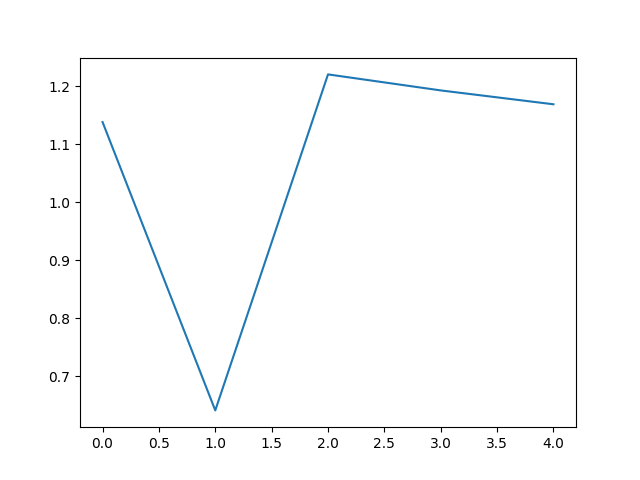

In [32]:
%matplotlib notebook
plt.plot(y)
# plt.plot(predictions, color='red')
# plt.show()

In [7]:
series.head()


,id,monitor_id,metric,result_str,result_float1,result_float2,result_float3,result_float4,result_float5,Day
ts,,,,,,,,,,
2019-07-17 07:46:09.623416,1,1,UPTIME,"b'{""ERROR"":""0"",""MESSAGE"":"""",""RESULT"":""pong"",""T...",1,1.047807,\N,\N,\N,17
2019-07-17 07:46:10.155872,2,2,UPTIME,"b'{""ERROR"":""0"",""MESSAGE"":"""",""RESULT"":""pong"",""T...",1,0.521538,\N,\N,\N,17
2019-07-17 07:46:11.212859,3,3,UPTIME,"b'{\n ""ERROR"": 0,\n ""RESULT"": ""pong""\n}'",1,1.046748,\N,\N,\N,17
2019-07-17 07:46:12.503839,4,4,UPTIME,"b'{\n ""ERROR"": 0,\n ""RESULT"": ""pong""\n}'",1,1.280435,\N,\N,\N,17
2019-07-17 07:51:20.186718,5,1,UPTIME,"b'{""ERROR"":""0"",""MESSAGE"":"""",""RESULT"":""pong"",""T...",1,0.980852,\N,\N,\N,17


In [8]:
series.tail()


,id,monitor_id,metric,result_str,result_float1,result_float2,result_float3,result_float4,result_float5,Day
ts,,,,,,,,,,
2019-08-12 05:55:18.870758,89875,1,UPTIME,"b'{""ERROR"":""0"",""MESSAGE"":"""",""RESULT"":""pong"",""T...",1,1.303379,\N,\N,\N,12
2019-08-12 05:55:18.946669,89876,1,UPTIME,"b'{""ERROR"":""0"",""MESSAGE"":"""",""RESULT"":""pong"",""T...",1,1.158762,\N,\N,\N,12
2019-08-12 05:55:20.359700,89877,5,UPTIME,"b""{'error': 0, 'message': 'pong', 'ts': 'Mon A...",1,1.505069,\N,\N,\N,12
2019-08-12 05:55:20.403153,89878,5,UPTIME,"b""{'error': 0, 'message': 'pong', 'ts': 'Mon A...",1,1.524240,\N,\N,\N,12
2019-08-12 05:55:20.417926,89879,5,UPTIME,"b""{'error': 0, 'message': 'pong', 'ts': 'Mon A...",1,1.456023,\N,\N,\N,12


In [3]:

for i in range(1,numMax+1):
    df=series.loc[series['monitor_id'] == i]
    print(df.describe())
    a=df.describe()
    print(dataset1.loc[dataset1['id']==i]['label'])
    print(dataset1.loc[dataset1['id']==1]['host_uri'])
    print("have speed: Mean=%f and std = %f "%(a.loc['mean']['result_float2'],a.loc['std']['result_float2']))

                 id  monitor_id  result_float1  result_float2           Day
count  18304.000000     18304.0   18304.000000   18304.000000  18304.000000
mean   44161.144996         1.0       0.999672       1.138049     17.641171
std    26311.084704         0.0       0.025603       0.649202     10.140851
min        1.000000         1.0      -1.000000       0.000000      1.000000
25%    21189.750000         1.0       1.000000       1.006237      6.000000
50%    44077.500000         1.0       1.000000       1.082552     21.000000
75%    66980.250000         1.0       1.000000       1.193509     26.000000
max    89876.000000         1.0       1.000000      38.867926     31.000000
2    Formotiv DEV API
Name: label, dtype: object
2    https://betapi.formotiv.com/v1/ping
Name: host_uri, dtype: object
have speed: Mean=1.138049 and std = 0.649202 
                 id  monitor_id  result_float1  result_float2           Day
count  18319.000000     18319.0        18319.0   18319.000000  18319.00000

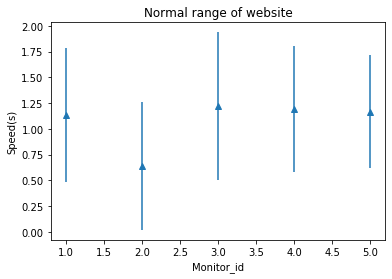

In [13]:
x = numpy.array([1, 2, 3, 4, 5])
y = numpy.array([1.138049,0.641053,1.220180,1.192573,1.168675]) # Effectively y = x**2
e = numpy.array([0.649202, 0.623338 , 0.717865, 0.611483, 0.551198])

plt.errorbar(x, y, e, linestyle='None', marker='^')
plt.title('Normal range of website')
plt.xlabel('Monitor_id')
plt.ylabel('Speed(s)')
plt.show()

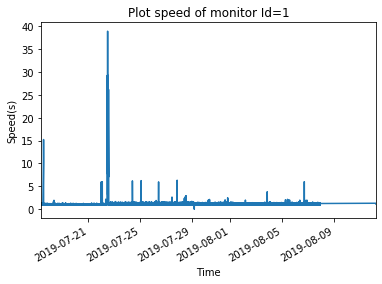

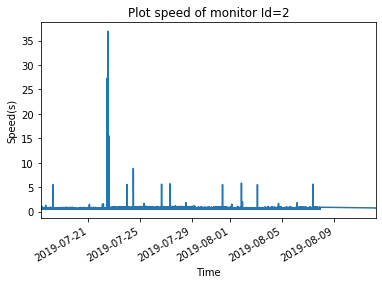

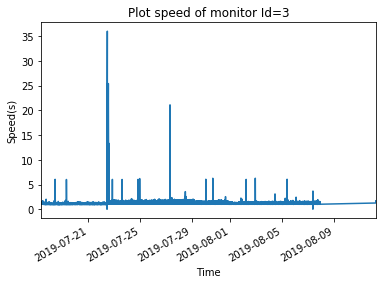

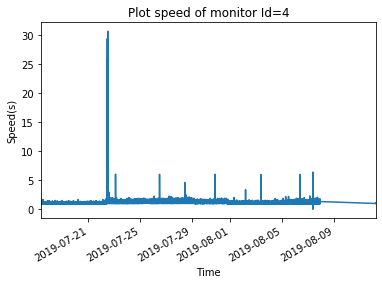

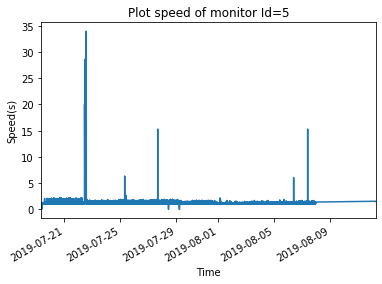

In [17]:
dataseta['result_float2'].plot()
plt.title('Plot speed of monitor Id=1')
plt.xlabel('Time')
plt.ylabel('Speed(s)')
plt.show()
datasetb=series.loc[series['monitor_id'] == 2]
datasetb['result_float2'].plot()
plt.title('Plot speed of monitor Id=2')
plt.xlabel('Time')
plt.ylabel('Speed(s)')
plt.show()
datasetc=series.loc[series['monitor_id'] == 3]
datasetc['result_float2'].plot()
plt.title('Plot speed of monitor Id=3')
plt.xlabel('Time')
plt.ylabel('Speed(s)')
plt.show()
datasetd=series.loc[series['monitor_id'] == 4]
datasetd['result_float2'].plot()
plt.title('Plot speed of monitor Id=4')
plt.xlabel('Time')
plt.ylabel('Speed(s)')
plt.show()
datasete=series.loc[series['monitor_id'] == 5]
datasete['result_float2'].plot()
plt.title('Plot speed of monitor Id=5')
plt.xlabel('Time')
plt.ylabel('Speed(s)')
plt.show()

In [40]:
## manually configured ARIMA
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)
X= dataset['result_float2'].values
stationary = difference(X, minutes_in_hour)
stationary.index = dataset.index[minutes_in_hour:]
#check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
#save
stationary.to_csv('stationary.csv')
# plot
# stationary.plot()
# plt.show()
# # Draw ACF and PACF Autocorrelation Function and Partial
# plt.figure()
# plt.subplot(211)
# plot_acf(stationary, ax=plt.gca())
# plt.subplot(212)
# plot_pacf(stationary, ax=plt.gca())
# plt.show()

ADF Statistic: -18.025160
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


/Users/tham/mlearning/venv/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


<IPython.core.display.Javascript object>


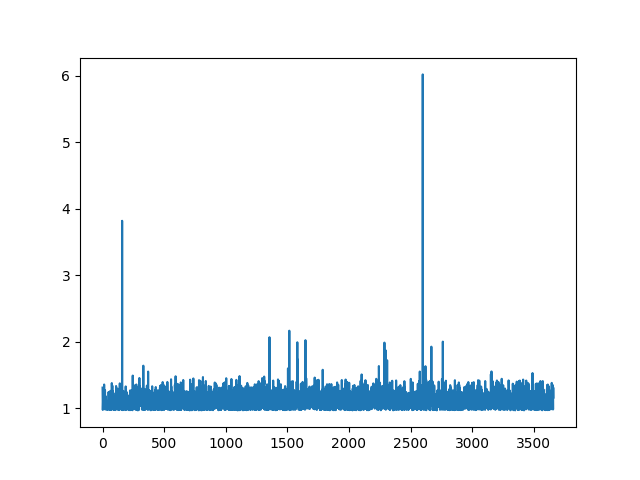

In [35]:
%matplotlib notebook
plt.plot(validation['result_float2'].values)

<IPython.core.display.Javascript object>


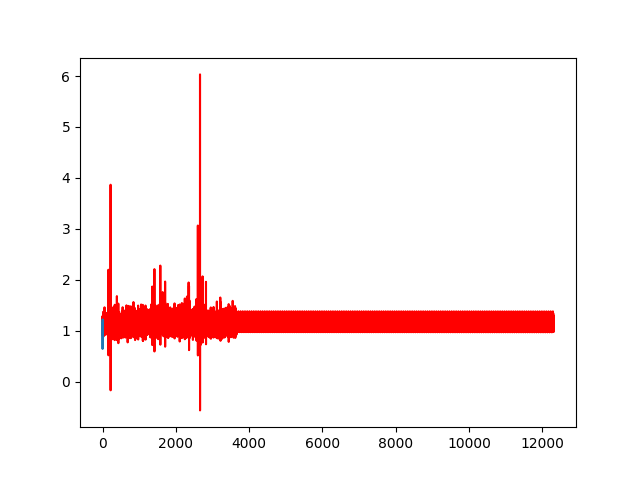

In [39]:
%matplotlib notebook

plt.plot(predictions, color='red')
plt.plot(y)
plt.show()